## 0. The normal distribution

In [14]:
randn()

0.4408106770596617

In [42]:
randn()

-0.9012911518994019

In [46]:
randn()

1.2505464003852211

In [15]:
using Plots

In [16]:
pyplot()

Plots.PyPlotBackend()

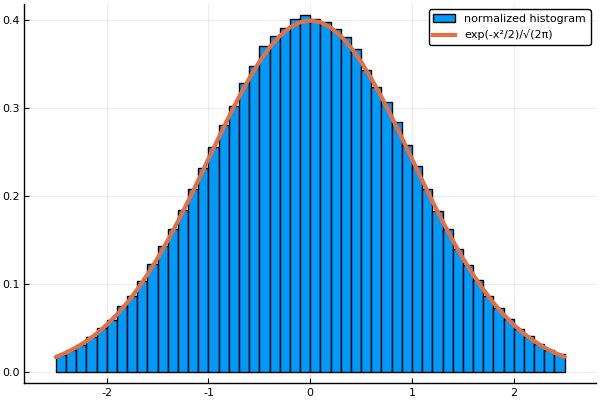

In [53]:
x = -2.5:.1:2.5; N = 1_000_000
histogram(randn(N), bins=x, normalized=true, label="normalized histogram")
plot!(x,exp.(-x.^2/2)./√(2π), linewidth=3, label="exp(-x²/2)/√(2π)")

In [4]:
N = 100_000_000
x = randn(N)
sum(x)/N, sum(x.^2)/N σ²

(1.3429369941805908e-5, 0.9999799972744179)

In [5]:
x = randn(N)
sum(x)/N, sum(x.^2)/N

(1.2607419023385073e-5, 1.000060923953871)

In [6]:
x = randn(N)
sum(x)/N, sum(x.^2)/N

(5.105633150334836e-5, 0.9999638965369215)

In [7]:
x = randn(N)
sum(x)/N, sum(x.^2)/N

(-0.00021861216321156037, 0.9999782960223332)

In [10]:
x = randn(N)
sum(x)/N, sum(x.^2)/N

(-3.2452654789061673e-6, 1.0000202384290602)

In [9]:
x = randn(N)
sum(x)/N, sum(x.^2)/N

(-0.0002076851882014109, 1.0003853536632483)

The formula for [sample variance](https://en.wikipedia.org/wiki/Variance#Sample_variance):
    $$s_n^2 = \frac{1}{n-1}\sum (x_i-\bar{x})^2$$
    has that funny $n-1$ in the denominator.
    
The n-1 is referred to as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
The usual explanation involves vague terms such as [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics%29) which always sounded flaky to me.

## 1. Let us first check the n-1 by experiment

In [10]:
using Statistics, LinearAlgebra

In [11]:
function f(n)
    x = randn(n)
    norm(x.-mean(x))^2
end

f (generic function with 1 method)

In [12]:
n=11
mean([f(n) for i=1:1_000_000])

10.007691156448987

In [13]:
n=5
mean([f(n) for i=1:1_000_000])

4.0019685835344765

## 2. A few facts about randn

randn(n) is an n-vector of independent standard normals.

If Q is any orthgonal matrix, $Q*$randn(n) is also an n-vector of independent standard normals.
There is no mathematical way to distinguish randn(n) from $Q*$randn(n). This is because the
probability function is proportional to $e^{-\|x\|^2/2}$, i.e., it only depends on the length of x, not
the direction.

Also the expected value of randn(1)^2 is 1.

## 3. Linear Algebra makes n-1 easy to understand

Consider the projection matrix $P=I-1/n$. The matrix-vector product $Px$ computes x-mean(x).

In [20]:
# example 
n = 4
P = Matrix(I,n,n) .- 1//n

4×4 Array{Rational{Int64},2}:
  3//4  -1//4  -1//4  -1//4
 -1//4   3//4  -1//4  -1//4
 -1//4  -1//4   3//4  -1//4
 -1//4  -1//4  -1//4   3//4

If we write the eigendecomposition $P=Q\Lambda Q'$, then $\Lambda$ has one diagonal entry (say the first) $0$ and the
rest $1$.
<br>
Therefore if x=randn(n) so is Qx as a random variable, and $$\|PQx\|^2 = \|Q\Lambda x\|^2 = \|\Lambda x\|^2=x_2^2 +\ldots+x_n^2 $$ which is obviously n-1 in expectation.